# PHASE 7: Synthetic accessibility scores

"""
Calculating the synthetic accessibility score of molecules 

Created on Thursday, 13 July 2023

Updated on Tuesday 08 August 2023 - Added plot to compare scores

Updated on Tuesday 15 August 2023 - Added lead ACEIs and ARBs with TC score of 0.7 or greater

Updated on Thursday 26 October 2023 - Editing


@author: Odifentse M Lehasa

The purpose of this notebook is to calculate the synthetic accessibility (SA) score of the molecules. 

The SA score determines the ease of synthesising a molecules, ranging from 1 (easy) to 10 (difficult). 

The SA scores of the new molecules are then compared against the SA scores of the original molecules.



"""

## Step 0: Import libraries

In [59]:
from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys
import pandas as pd

sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

from matplotlib import pyplot as plt
import seaborn as sns


## Explanation of the process

"""

Phase 6 determined the clusters that demonstrated the highest similarity to the each of the two C09 drug classes.

#### New ACEIs:
We will take the cluster that scored the highest average similarity to the original ACEIs, and use this to refer
to the new ACEIs.

#### New ARBS:
We will take the cluster that scored the highest average similarity to the original ARBs, and use this to refer
to the new ARBs.

Therefore, as there were 3 clusters, 1 cluster will remain. This is the cluster with the molecules that do not best
resemble the original ACEIs nor ARBs. 

We will no analyse the molecules in this cluster further.

#### Steps (to be executed below):
i. Open the file from Phase 6 that contains the cluster that scored the highest average similarity to ARBs.
   e.g., In this case we will use "6.4. Similarity_Cluster 0 and ARB.csv"

ii. Keep only the records with a score greater than 0.7 and delete the rest.

iii. Remove duplicates from the "New molecules" column to display unique new molecules.

iv. Save this as a new CSV file

"""

## Step 1: Get new ARBs (with TC>=0.7)

In [30]:
# New ARBs

# Step i: Open the file from Phase 6 that contains the cluster that scored the highest average similarity to ARBs.
#         e.g., In this case we will use "6.4. Similarity_Cluster 0 and ARB.csv"

clust0 = pd.read_csv('/Users/odilehasa/Hypertension/Final_Experiments/FINAL - October/Output/6.4. Similarity_Cluster 0 and ARB.csv')


# Step ii: Keep only the records with a score greater or equal to 0.7 and delete the rest.

arb_sim = clust0[clust0['Similarity Score_0ARB'] >= 0.7]

# Step iii: Display only the new molecules column and remove duplicates

new_arbs = pd.DataFrame(arb_sim["New molecules"].unique())

# Step iv: Save new mols as CSV file

new_arbs.to_csv('7. New lead ARB molecules.csv')

new_arbs



,0
0,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
1,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
2,CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...
3,CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...
4,CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...
...,...
305,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
306,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
307,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
308,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...


## Step 2: Get new ACEIs (with TC>=0.7)

In [31]:
# New ACEIs

# Step i: Open the file from Phase 6 that contains the cluster that scored the highest average similarity to ACEIs.
#         e.g., In this case we will use "6.3 Similarity_Cluster 2 and ACEI.csv"

clust2 = pd.read_csv('/Users/odilehasa/Hypertension/Final_Experiments/FINAL - October/Output/6.3 Similarity_Cluster 2 and ACEI.csv')


# Step ii: Keep only the records with a score greater or equal to 0.7 and delete the rest.

ace_sim = clust2[clust2['Similarity Score_2ACEI'] >= 0.7]

# Step iii: Display only the new molecules column and remove duplicates

new_acei = pd.DataFrame(ace_sim["New molecules"].unique())

# Step iv: Save new mols as CSV file

new_acei.to_csv('7. New lead ACEI molecules.csv')

new_acei



,0
0,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
1,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
2,CC(C)[C@H](N[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C...
3,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
4,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
...,...
424,CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](c2ccccc2)...
425,CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](C2CCCCC2)...
426,CO[C@@H]1C[C@@H]2CCCC[C@@H]2N1[C@@H](CCCCN)C(=...
427,CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](CO)C[C@@H...


## Step 3: Calculate SA Scores for new ACEIs

In [37]:
# use ACEIs from step 2

ACEIsmiles = new_acei[0]
ACEIsmiles

0      NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
1      NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
2      CC(C)[C@H](N[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C...
3      NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
4      NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...
                             ...                        
424    CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](c2ccccc2)...
425    CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](C2CCCCC2)...
426    CO[C@@H]1C[C@@H]2CCCC[C@@H]2N1[C@@H](CCCCN)C(=...
427    CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](CO)C[C@@H...
428    CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](c2cccs2)C...
Name: 0, Length: 429, dtype: object

In [38]:
# convert molecules from SMILES format to Mol object so that these can be analysed 

new_ACEImolecules = [Chem.MolFromSmiles(x) for x in ACEIsmiles]
new_ACEImolecules

In [63]:
# Calculate SA score for new ACEIs 

score_newACEI = []

for x in new_ACEImolecules:
    sa_scores_new = sascorer.calculateScore(x)
    molscore = (Chem.MolToSmiles(x), sa_scores_new)
    score_newACEI.append(molscore)
    
score_newACEI

[('NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21)N1CC2(C[C@H]1C(=O)O)SCCS2',
  4.982629621538802),
 ('NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21)N1[C@H](C(=O)O)C[C@@H]2CCC[C@@H]21',
  4.368081881877715),
 ('CC(C)[C@H](N[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21)C(=O)O',
  3.830099964222203),
 ('NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21)N1C[C@H](C2CCCCC2)C[C@H]1C(=O)O',
  4.267261070904295),
 ('NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21)N1CCC[C@H]1C(=O)O',
  3.948687974187944),
 ('CC(C)[C@H](O[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21)C(=O)O',
  4.109384174748518),
 ('CCCCC(=O)O[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21',
  3.7287416601494314),
 ('CCC(=O)O[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21',
  3.7849127137522673),
 ('C[C@H](CS)C(=O)O[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21',
  4.120817090227848),
 ('NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21)N1[C@H](C(=O)O)C[C@@H]2CCCC[C@@H]21',
  4.34

In [47]:
df_ACEIscores = pd.DataFrame(score_newACEI)

# save as a CSV file
df_ACEIscores.to_csv('7.1 New lead ACEI SA scores.csv')
df_ACEIscores

,0,1
0,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...,4.982630
1,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...,4.368082
2,CC(C)[C@H](N[C@@H](CCCCN)C(=O)N1[C@H](C(=O)O)C...,3.830100
3,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...,4.267261
4,NCCCC[C@@H](C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@...,3.948688
...,...,...
424,CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](c2ccccc2)...,4.009429
425,CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](C2CCCCC2)...,4.148595
426,CO[C@@H]1C[C@@H]2CCCC[C@@H]2N1[C@@H](CCCCN)C(=...,4.272827
427,CC(C)[C@H](OC(=O)[C@H](CCCCN)N1[C@H](CO)C[C@@H...,4.184586


### SA Scores for new ARBs

In [42]:
# use ARBs from step 1

ARBsmiles = new_arbs[0]
ARBsmiles

0      NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
1      NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
2      CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...
3      CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...
4      CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...
                             ...                        
305    CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
306    CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
307    CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
308    CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
309    CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...
Name: 0, Length: 310, dtype: object

In [43]:
# convert molecules from SMILES format to Mol object so that these can be analysed 

new_ARBmolecules = [Chem.MolFromSmiles(x) for x in ARBsmiles]
new_ARBmolecules

In [44]:
# Calculate SA score for new ARBs 

score_newARB = []

for x in new_ARBmolecules:
    sa_scores_newARB = sascorer.calculateScore(x)
    ARBmolscore = (Chem.MolToSmiles(x), sa_scores_newARB)
    score_newARB.append(ARBmolscore)
    
score_newARB

[('NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]21)N1Cc2ccccc2C[C@H]1c1nnn[nH]1',
  4.511763942604566),
 ('NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]21)N1Cc2ccccc2C[C@H]1c1nn[nH]n1',
  4.41771918735981),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN)N1CCC[C@H]1c1nnn[nH]1',
  4.529207594277348),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN)N1CCC[C@H]1c1nn[nH]n1',
  4.436093005417931),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN)N1[C@H](c2nnn[nH]2)C[C@@H]2CCCC[C@@H]21',
  4.831339256230043),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN)N1[C@H](c2nn[nH]n2)C[C@@H]2CCCC[C@@H]21',
  4.737294500985288),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN)N1[C@H](c2nnn[nH]2)C[C@@H]2CCC[C@@H]21',
  4.859664681233119),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN)N1[C@H](c2nn[nH]n2)C[C@@H]2CCC[C@@H]21',
  4.762681027386966),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN)N1[C@H](c2nnn[nH]2)C[C@H]2CCCC[C@@H]21',
  4.831339256230043),
 ('CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C

In [48]:
df_ARBscores = pd.DataFrame(score_newARB)

#save as CSV file
df_ARBscores.to_csv('7.2 New lead ARB SA scores.csv')

df_ARBscores

,0,1
0,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,4.511764
1,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...,4.417719
2,CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...,4.529208
3,CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...,4.436093
4,CCC[C@@H]1C[C@H]2CCCC[C@@H]2N1C(=O)[C@H](CCCCN...,4.831339
...,...,...
305,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...,4.762681
306,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...,4.542772
307,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...,4.448728
308,CCC[C@@H]1C[C@@H]2CCC[C@@H]2N1C(=O)[C@H](CCCCN...,4.768699


### SA Scores for original ACEI molecules

In [49]:
# import dataset of original molecules 

df_ace = pd.read_csv('/Users/odilehasa/Hypertension/Final_Experiments/FINAL - October/Data/ACE Inhibitors.csv', index_col=0)

# keep only the smiles column 
df_ogace = df_ace['Canonical SMILES']
df_ogace

1     C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@...
3     COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c...
7     CCOC(=O)[C@H](CCc1ccccc1)N[C@H]1CCc2ccccc2N(CC...
10                     C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O
11    CCOC(=O)[C@H](CCc1ccccc1)N[C@H]1CCCN2CCC[C@@H]...
13    CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[...
16    CCC(=O)O[C@@H](O[P@](=O)(CCCCc1ccccc1)CC(=O)N1...
17    CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1C(=O...
19    NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...
21    CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1Cc2c...
23    CCC[C@H](N[C@@H](C)C(=O)N1[C@H](C(=O)O)C[C@@H]...
24    CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1Cc2c...
25    CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1[C@H...
27    CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CC2(...
31    CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1[C@H...
Name: Canonical SMILES, dtype: object

In [51]:

# Convert SMILES format to Mol 
og_ACE = [Chem.MolFromSmiles(x) for x in df_ogace]

# calculate sa score for original molecules 

score_ogACE = []

for x in og_ACE:
    sa_scores_ogACE = sascorer.calculateScore(x)
    og_molscoreACE = (Chem.MolToSmiles(x), sa_scores_ogACE)
    score_ogACE.append(og_molscoreACE)

score_ogACE

[('C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@H]1C(=O)O.O.O',
  3.1644729487471626),
 ('COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c4CCN3C[C@H]2C[C@@H](OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)[C@@H]1OC',
  4.458333181449569),
 ('CCOC(=O)[C@H](CCc1ccccc1)N[C@H]1CCc2ccccc2N(CC(=O)O)C1=O',
  3.0042392520953562),
 ('C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O', 3.0325466057405706),
 ('CCOC(=O)[C@H](CCc1ccccc1)N[C@H]1CCCN2CCC[C@@H](C(=O)O)N2C1=O',
  3.4774448804592613),
 ('CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[C@H]1C(=O)O',
  3.0510268729075083),
 ('CCC(=O)O[C@@H](O[P@](=O)(CCCCc1ccccc1)CC(=O)N1C[C@H](C2CCCCC2)C[C@H]1C(=O)O)C(C)C',
  4.100363760837594),
 ('CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1C(=O)N(C)C[C@H]1C(=O)O',
  3.4428543155507905),
 ('NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@H]1C(=O)O',
  3.172402687291566),
 ('CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1Cc2cc(OC)c(OC)cc2C[C@H]1C(=O)O',
  3.385282482071249),
 ('CCC[C@H](N[C@@H](C)C(=O)N1[C@H](C(=O)O)C[C@@H]2CCCC[C@@H]21)C(=O)O

In [52]:
df_ogACEscores = pd.DataFrame(score_ogACE)

#save as CSV file
df_ogACEscores.to_csv('7.3 Original ACEI SA scores.csv')

df_ogACEscores

,0,1
0,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@...,3.164473
1,COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c...,4.458333
2,CCOC(=O)[C@H](CCc1ccccc1)N[C@H]1CCc2ccccc2N(CC...,3.004239
3,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,3.032547
4,CCOC(=O)[C@H](CCc1ccccc1)N[C@H]1CCCN2CCC[C@@H]...,3.477445
5,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1CCC[...,3.051027
6,CCC(=O)O[C@@H](O[P@](=O)(CCCCc1ccccc1)CC(=O)N1...,4.100364
7,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1C(=O...,3.442854
8,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,3.172403
9,CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1Cc2c...,3.385282


### SA Scores for Original ARBs

In [53]:
df_arb = pd.read_csv('/Users/odilehasa/Hypertension/Final_Experiments/FINAL - October/Data/ARBs.csv', index_col=0)

# keep only the smiles column 
df_ogarb = df_arb['Canonical SMILES']
df_ogarb

2     CCCc1nc(C(C)(C)O)c(C(=O)O)n1Cc1ccc(-c2ccccc2-c...
4     CCCCC1=NC2(CCCC2)C(=O)N1CC1=CC=C(C(COCC)=C1)C1...
6     CCOc1nc2cccc(C(=O)OCc3oc(=O)oc3C)c2n1Cc1ccc(-c...
9     CCOc1nc2cccc(C(=O)OC(C)OC(=O)OC3CCCCC3)c2n1Cc1...
14    CCCCc1ncc(/C=C(\Cc2cccs2)C(=O)O)n1Cc1ccc(C(=O)...
18    CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nn[...
20    CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2...
22    CCCc1nc(C(C)(C)O)c(C(=O)OCc2oc(=O)oc2C)n1Cc1cc...
29    CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...
32    CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1)[C@...
Name: Canonical SMILES, dtype: object

In [54]:
# Convert SMILES format to Mol
og_ARB = [Chem.MolFromSmiles(x) for x in df_ogarb]

# calculate the SA score for original ARB molecules

score_ogARB = []

for x in og_ARB:
    sa_scores_ogARB = sascorer.calculateScore(x)
    og_molscoreARB = (Chem.MolToSmiles(x), sa_scores_ogARB)
    score_ogARB.append(og_molscoreARB)

score_ogARB

[('CCCc1nc(C(C)(C)O)c(C(=O)O)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
  2.807026157060651),
 ('CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2S(=O)(=O)Nc2noc(C)c2C)c(COCC)c1',
  3.6228132400587274),
 ('CCOc1nc2cccc(C(=O)OCc3oc(=O)oc3C)c2n1Cc1ccc(-c2ccccc2-c2noc(=O)[nH]2)cc1',
  3.2307765434068108),
 ('CCOc1nc2cccc(C(=O)OC(C)OC(=O)OC3CCCCC3)c2n1Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1',
  3.4588264894340686),
 ('CCCCc1ncc(/C=C(\\Cc2cccs2)C(=O)O)n1Cc1ccc(C(=O)O)cc1', 2.6133895078513127),
 ('CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1',
  3.1614453370468834),
 ('CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1', 2.650098966425194),
 ('CCCc1nc(C(C)(C)O)c(C(=O)OCc2oc(=O)oc2C)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
  3.226134144685334),
 ('CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2ccccc2C(=O)O)cc1',
  2.524348968313056),
 ('CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1)[C@H](C(=O)O)C(C)C',
  3.052883274853756)]

In [55]:
# view dataframe of scores
df_ogARBscores = pd.DataFrame(score_ogARB)

#save as CSV file
df_ogARBscores.to_csv('7.4 Original ARB SA scores.csv')

df_ogARBscores


,0,1
0,CCCc1nc(C(C)(C)O)c(C(=O)O)n1Cc1ccc(-c2ccccc2-c...,2.807026
1,CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2S(=O)(...,3.622813
2,CCOc1nc2cccc(C(=O)OCc3oc(=O)oc3C)c2n1Cc1ccc(-c...,3.230777
3,CCOc1nc2cccc(C(=O)OC(C)OC(=O)OC3CCCCC3)c2n1Cc1...,3.458826
4,CCCCc1ncc(/C=C(\Cc2cccs2)C(=O)O)n1Cc1ccc(C(=O)...,2.613390
5,CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nn[...,3.161445
6,CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2...,2.650099
7,CCCc1nc(C(C)(C)O)c(C(=O)OCc2oc(=O)oc2C)n1Cc1cc...,3.226134
8,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,2.524349
9,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1)[C@...,3.052883


## Step 4: Combine dataframes

In [60]:
all_SAs = pd.concat([df_ACEIscores.iloc[:,1], df_ogACEscores.iloc[:,1], df_ARBscores.iloc[:,1],  df_ogARBscores.iloc[:,1]], axis="columns")


all_SAs.set_axis(['Lead (New) ACEIs', 'Original ACEIs', 'Lead (New) ARBs', 'Original ARBs'], axis='columns', inplace=True)

# save new dataframe
all_SAs.to_csv('7.5 Synthetic Accessibility Score (Lead vs Original Mols).csv')

all_SAs

,Lead (New) ACEIs,Original ACEIs,Lead (New) ARBs,Original ARBs
0,4.982630,3.164473,4.511764,2.807026
1,4.368082,4.458333,4.417719,3.622813
2,3.830100,3.004239,4.529208,3.230777
3,4.267261,3.032547,4.436093,3.458826
4,3.948688,3.477445,4.831339,2.613390
...,...,...,...,...
424,4.009429,NaN,NaN,NaN
425,4.148595,NaN,NaN,NaN
426,4.272827,NaN,NaN,NaN
427,4.184586,NaN,NaN,NaN


## Step 5: Visualise SA scores of new and original molecules as a Swarm Plot

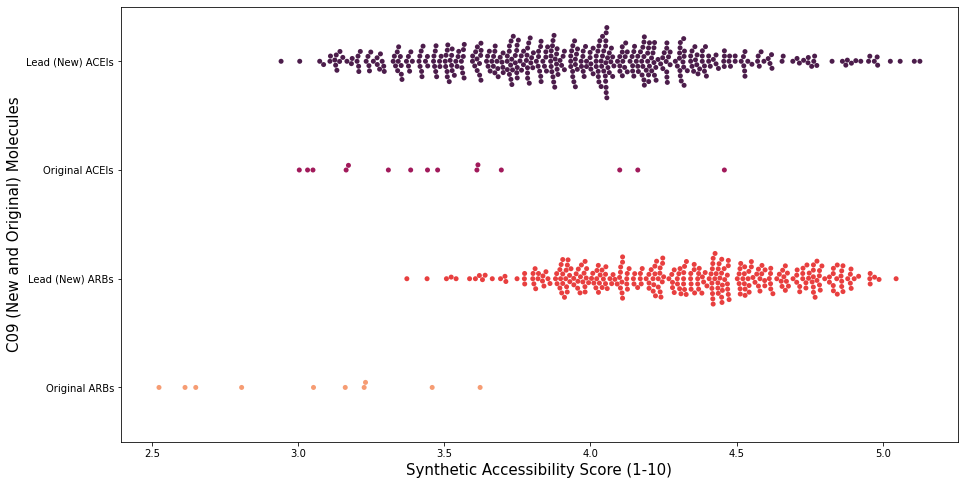

In [61]:


fig, lines = plt.subplots(figsize=(15, 8))
plt.rcParams.update({'font.size': 13.5})   # specify font size for all labels without specified font sizes
plt.rc('xtick', labelsize=15)       # specify font size for all labels without specified font sizes


sns.swarmplot(data = all_SAs, orient="h", palette="rocket")
lines.set_ylabel('C09 (New and Original) Molecules', fontsize=15)
lines.set_xlabel('Synthetic Accessibility Score (1-10)', fontsize=15)

plt.savefig('7.6. Comparison of Synthetic Accessibility scores.png')

## Step 6: Calculate average SA Scores

In [67]:
# ----- NEW ACEIs 

score_newACEI = []

for x in new_ACEImolecules:
    sa_scores_new = sascorer.calculateScore(x)
    score_newACEI.append(sa_scores_new)

avg_sa_newACE = sum(score_newACEI)/len(score_newACEI)
print("Average synthetic accessibility score of new lead ACEI molecules is: ",avg_sa_newACE)


# ------ NEW ARBs 

score_newARB = []

for x in new_ARBmolecules:
    sa_scores_new = sascorer.calculateScore(x)
    score_newARB.append(sa_scores_new)
    
avg_sa_newARB = sum(score_newARB)/len(score_newARB)
print("Average synthetic accessibility score of new lead ARB molecules is: ",avg_sa_newARB)


# ------ ORIGINAL ACEIs

score_ogACE = []

for x in og_ACE:
    sa_scores_ogACE = sascorer.calculateScore(x)
    score_ogACE.append(sa_scores_ogACE)

avg_sa_ogACE = sum(score_ogACE)/len(score_ogACE)
print("Average synthetic accessibility score of the original ACE molecules is: ",avg_sa_ogACE)

# ----- ORIGINAL ARBs

score_ogARB = []

for x in og_ARB:
    sa_scores_ogARB = sascorer.calculateScore(x)
    score_ogARB.append(sa_scores_ogARB)

avg_sa_ogARB = sum(score_ogARB)/len(score_ogARB)
print("Average synthetic accessibility score of the original ARB molecules is: ",avg_sa_ogARB)
    

Average synthetic accessibility score of new lead ACEI molecules is:  3.949020210904902
Average synthetic accessibility score of new lead ARB molecules is:  4.318959484076033
Average synthetic accessibility score of the original ACE molecules is:  3.5121786294012196
Average synthetic accessibility score of the original ARB molecules is:  3.0347742629135794


# ---END---